### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd

dados = pd.read_csv('../files/diabetes.csv')

dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [2]:
x = dados.drop('diabetes', axis=1)
y = dados['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [3]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [4]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [9]:
arvore = DecisionTreeClassifier(max_depth = 10)
random_forest = RandomForestClassifier(max_depth = 10)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5860912964433126, 0.7846751919702347]
Intervalo de confiança (Random Forest): [0.5446786143528479, 0.831078961404728]


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [29]:
arvore.fit(x,y)
y_previsto_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto_arvore)
print(matriz_confusao)

[[51  5]
 [ 2 26]]


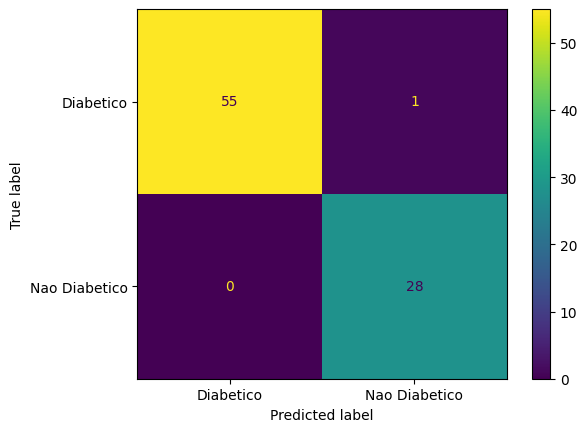

In [18]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Diabetico', 'Nao Diabetico'])
visualizacao.plot();

[[56  0]
 [ 0 28]]


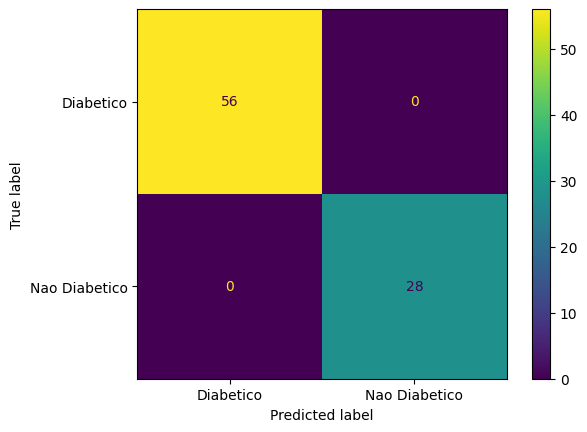

In [30]:
random_forest.fit(x,y)
y_previsto_random = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto_random)
print(matriz_confusao)
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Diabetico', 'Nao Diabetico'])
visualizacao.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [19]:

kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(arvore, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.01107097, 0.0012238 , 0.00107312, 0.00097895, 0.00096083]),
 'score_time': array([0.00577307, 0.00249815, 0.00219774, 0.00210118, 0.00421596]),
 'test_accuracy': array([0.70149254, 0.65671642, 0.58208955, 0.68656716, 0.65151515]),
 'test_recall': array([0.54166667, 0.61538462, 0.45454545, 0.44      , 0.46153846]),
 'test_precision': array([0.59090909, 0.30769231, 0.38461538, 0.61111111, 0.57142857]),
 'test_f1': array([0.56521739, 0.41025641, 0.41666667, 0.51162791, 0.5106383 ])}

In [20]:

kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(random_forest, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.06466508, 0.04747891, 0.04708791, 0.04588389, 0.04671407]),
 'score_time': array([0.00384903, 0.00354505, 0.00343418, 0.00341296, 0.0034771 ]),
 'test_accuracy': array([0.71641791, 0.7761194 , 0.71641791, 0.64179104, 0.60606061]),
 'test_recall': array([0.45833333, 0.76923077, 0.5       , 0.36      , 0.19230769]),
 'test_precision': array([0.64705882, 0.45454545, 0.57894737, 0.52941176, 0.5       ]),
 'test_f1': array([0.53658537, 0.57142857, 0.53658537, 0.42857143, 0.27777778])}

### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

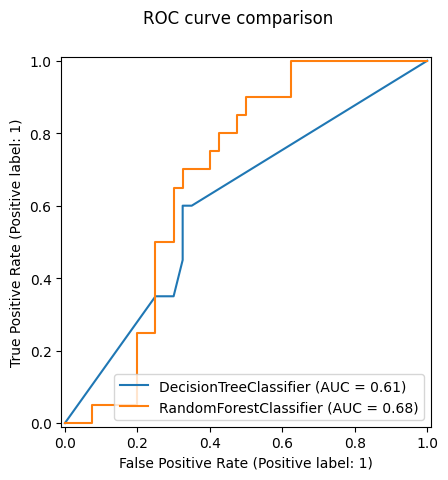

In [24]:
arvore_disp = RocCurveDisplay.from_estimator(arvore, x_teste, y_teste)
randon_disp = RocCurveDisplay.from_estimator(random_forest, x_teste, y_teste, ax=arvore_disp.ax_)
randon_disp.figure_.suptitle("ROC curve comparison")

plt.show()

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

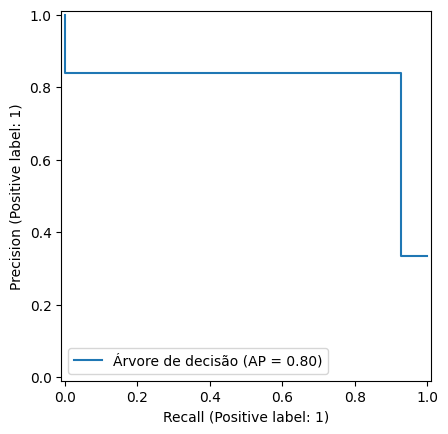

In [31]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_arvore, name = 'Árvore de decisão');

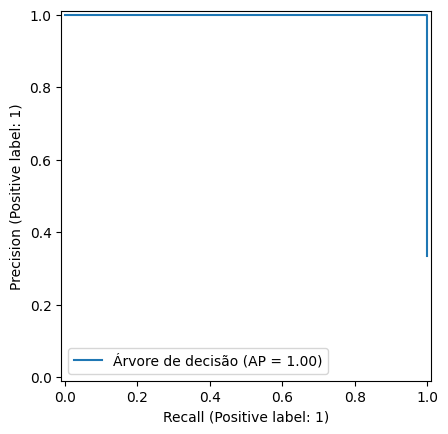

In [32]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto_random, name = 'Árvore de decisão');

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_val, y_previsto_arvore))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.84      0.93      0.88        28

    accuracy                           0.92        84
   macro avg       0.90      0.92      0.91        84
weighted avg       0.92      0.92      0.92        84



In [35]:
print(classification_report(y_val, y_previsto_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [36]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [37]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.50336929998429, 0.8663276697126798]
Intervalo de confiança (Random Forest): [0.5052243310880776, 0.8710680040277871]


### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

Intervalo de confiança (Decision Tree): [0.07111000888791685, 0.6370059845098103]
Intervalo de confiança (Random Forest): [0.028339378355852096, 0.6472068401315428]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

Intervalo de confiança (Decision Tree): [0.07111000888791685, 0.6370059845098103]
Intervalo de confiança (Random Forest): [0.03907661819884495, 0.5635304462193651]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [40]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}') 

Acurácia média (Decision Tree): 0.6916167664670658
Acurácia média (Random Forest):0.6856287425149701


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [41]:
dados['diabetes'].value_counts(normalize=True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, f1_score

# Definir o pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Configurar a validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir a métrica F1-Score
f1_scorer = make_scorer(f1_score)

# Avaliar o pipeline com validação cruzada
scores = cross_val_score(pipeline, x, y, scoring=f1_scorer, cv=cv)

# Exibir a média do F1-Score
print(f'Média do F1-Score: {np.mean(scores):.4f}')


Média do F1-Score: 0.6138


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, f1_score

# Definir o pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('nearmiss', NearMiss(version=3)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Configurar a validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir a métrica F1-Score
f1_scorer = make_scorer(f1_score)

# Avaliar o pipeline com validação cruzada
scores = cross_val_score(pipeline, x, y, scoring=f1_scorer, cv=cv)

# Exibir a média do F1-Score
print(f'Média do F1-Score: {np.mean(scores):.4f}')


Média do F1-Score: 0.5738


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [44]:

# Definir o pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Configurar a validação cruzada com StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir a métrica F1-Score
f1_scorer = make_scorer(f1_score)

# Avaliar o pipeline com validação cruzada
scores = cross_val_score(pipeline, x_teste, y_teste, scoring=f1_scorer, cv=cv)

# Exibir a média do F1-Score
print(f'Média do F1-Score: {np.mean(scores):.4f}')


Média do F1-Score: 0.4365


In [45]:
dados['diabetes'].value_counts(normalize = True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

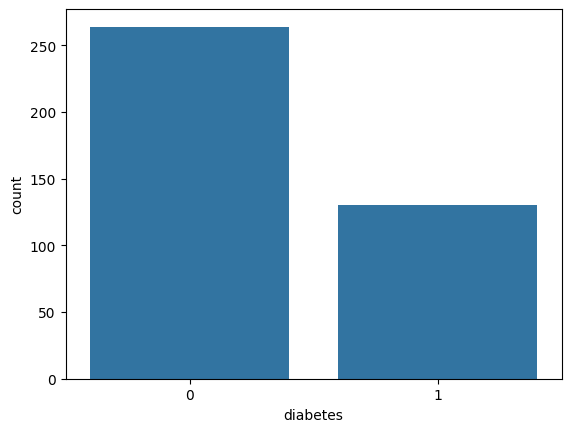

In [46]:
import seaborn as sns 

sns.countplot(dados, x = 'diabetes');

In [47]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [48]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.6055151897910519


In [49]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}') 

F1 (Random Forest):0.616295373847098


In [50]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [51]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}') 

F1 (Decision Tree):0.5430321693410148


In [52]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6253776749566222
